In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
USD_TO_VND = 27000
VND_TO_MILLION = 1000000

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("vietnamworks.csv", encoding="utf-8-sig")
df.head(5)

,_id,job_id,job_title,job_url,company_name,salary_currency,salary,salary_min,salary_max,pretty_salary,job_description[0],job_description[1],job_description[2],job_description[3],job_description[4],job_description[5],job_description[6],job_description[7],job_description[8],job_description[9],job_description[10],job_description[11],job_description[12],job_description[13],job_description[14],job_description[15],job_description[16],job_description[17],job_description[18],job_description[19],job_description[20],job_description[21],job_description[22],job_description[23],job_description[24],job_description[25],job_description[26],job_description[27],job_description[28],job_description[29],job_description[30],job_description[31],job_description[32],job_description[33],job_description[34],job_description[35],job_description[36],job_description[37],job_description[38],job_description[39],job_description[40],job_description[41],job_description[42],job_description[43],job_description[44],job_description[45],job_description[46],job_description[47],job_description[48],job_description[49],job_description[50],job_description[51],job_description[52],job_description[53],job_description[54],job_description[55],job_description[56],job_description[57],job_description[58],job_description[59],job_description[60],job_description[61],job_description[62],job_description[63],job_description[64],job_description[65],job_description[66],job_description[67],job_description[68],job_description[69],job_description[70],job_description[71],job_requirement[0],job_requirement[1],job_requirement[2],job_requirement[3],job_requirement[4],job_requirement[5],job_requirement[6],job_requirement[7],job_requirement[8],job_requirement[9],job_requirement[10],job_requirement[11],job_requirement[12],job_requirement[13],job_requirement[14],job_requirement[15],job_requirement[16],job_requirement[17],job_requirement[18],job_requirement[19],job_requirement[20],job_requirement[21],job_requirement[22],job_requirement[23],job_requirement[24],job_requirement[25],job_requirement[26],job_requirement[27],job_requirement[28],job_requirement[29],job_requirement[30],job_requirement[31],job_requirement[32],job_requirement[33],job_requirement[34],job_requirement[35],job_requirement[36],job_requirement[37],job_requirement[38],job_requirement[39],job_requirement[40],job_requirement[41],job_requirement[42],job_requirement[43],job_requirement[44],job_requirement[45],job_requirement[46],job_requirement[47],job_requirement[48],job_requirement[49],job_requirement[50],job_requirement[51],job_requirement[52],job_requirement[53],job_requirement[54],job_requirement[55],job_requirement[56],job_requirement[57],job_requirement[58],job_requirement[59],job_requirement[60],job_requirement[61],job_requirement[62],job_requirement[63],job_requirement[64],job_requirement[65],job_requirement[66],years_of_experience,min_degree,working_locations[0],working_locations[1],working_locations[2],address,language_selected_vi,job_level_vi,created_on,approved_on,expired_on,crawl_at,industries_v3[0],industries[0],skills[0],skills[1],skills[2],skills[3],skills[4],skills[5],skills[6],skills[7],skills[8],skills[9],benefits.Thưởng,benefits.Chăm sóc sức khoẻ,benefits.Đào tạo,group_job_functions,job_functions,benefits.Nghỉ phép có lương,benefits.Khác,benefits.Cơ hội du lịch,benefits.Máy tính xách tay,benefits.Giải thưởng,benefits.Hoạt động nhóm,benefits.Xe đưa đón,benefits.Căn-tin,benefits.Điện thoại,benefits.Thư viện,benefits.Nhà trẻ,benefits.Phiếu giảm giá
0,6947d9dbbd1b5428d8f72065,1978922,QA Game Tester,https://www.vietnamworks.com/qa-game-tester--1...,"Nexon Networks Vina Co. Ltd,",USD,0,0,0,Thương lượng,Chúng tôi tuyển dụng Nhân viên kiểm soát chất ...,Ứng viên đủ tiêu chuẩn cần có đôi mắt tinh tườ...,Ứng viên CẦN mô tả kinh nghiệm chơi Game hoặc ...,• Vị trí: nhân viên chính thức,Mô tả công việc:,• Kiểm soát nội dung cơ bản trong game.,• Kiểm soát các chức năng có độ phức tạp khác ...,• Nội dung kiểm tra liên quan đến dữ l

In [4]:
df.columns = df.columns.str.strip()
df.columns.to_list()

['_id',
 'job_id',
 'job_title',
 'job_url',
 'company_name',
 'salary_currency',
 'salary',
 'salary_min',
 'salary_max',
 'pretty_salary',
 'job_description[0]',
 'job_description[1]',
 'job_description[2]',
 'job_description[3]',
 'job_description[4]',
 'job_description[5]',
 'job_description[6]',
 'job_description[7]',
 'job_description[8]',
 'job_description[9]',
 'job_description[10]',
 'job_description[11]',
 'job_description[12]',
 'job_description[13]',
 'job_description[14]',
 'job_description[15]',
 'job_description[16]',
 'job_description[17]',
 'job_description[18]',
 'job_description[19]',
 'job_description[20]',
 'job_description[21]',
 'job_description[22]',
 'job_description[23]',
 'job_description[24]',
 'job_description[25]',
 'job_description[26]',
 'job_description[27]',
 'job_description[28]',
 'job_description[29]',
 'job_description[30]',
 'job_description[31]',
 'job_description[32]',
 'job_description[33]',
 'job_description[34]',
 'job_description[35]',
 'job

In [5]:
df.shape
df.info()
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Columns: 190 entries, _id to benefits.Phiếu giảm giá
dtypes: float64(1), int64(5), object(184)
memory usage: 1.0+ MB


,_id,job_title,job_url,company_name,salary_currency,pretty_salary,job_description[0],job_description[1],job_description[2],job_description[3],job_description[4],job_description[5],job_description[6],job_description[7],job_description[8],job_description[9],job_description[10],job_description[11],job_description[12],job_description[13],job_description[14],job_description[15],job_description[16],job_description[17],job_description[18],job_description[19],job_description[20],job_description[21],job_description[22],job_description[23],job_description[24],job_description[25],job_description[26],job_description[27],job_description[28],job_description[29],job_description[30],job_description[31],job_description[32],job_description[33],job_description[34],job_description[35],job_description[36],job_description[37],job_description[38],job_description[39],job_description[40],job_description[41],job_description[42],job_description[43],job_description[44],job_description[45],job_description[46],job_description[47],job_description[48],job_description[49],job_description[50],job_description[51],job_description[52],job_description[53],job_description[54],job_description[55],job_description[56],job_description[57],job_description[58],job_description[59],job_description[60],job_description[61],job_description[62],job_description[63],job_description[64],job_description[65],job_description[66],job_description[67],job_description[68],job_description[69],job_description[70],job_description[71],job_requirement[0],job_requirement[1],job_requirement[2],job_requirement[3],job_requirement[4],job_requirement[5],job_requirement[6],job_requirement[7],job_requirement[8],job_requirement[9],job_requirement[10],job_requirement[11],job_requirement[12],job_requirement[13],job_requirement[14],job_requirement[15],job_requirement[16],job_requirement[17],job_requirement[18],job_requirement[19],job_requirement[20],job_requirement[21],job_requirement[22],job_requirement[23],job_requirement[24],job_requirement[25],job_requirement[26],job_requirement[27],job_requirement[28],job_requirement[29],job_requirement[30],job_requirement[31],job_requirement[32],job_requirement[33],job_requirement[34],job_requirement[35],job_requirement[36],job_requirement[37],job_requirement[38],job_requirement[39],job_requirement[40],job_requirement[41],job_requirement[42],job_requirement[43],job_requirement[44],job_requirement[45],job_requirement[46],job_requirement[47],job_requirement[48],job_requirement[49],job_requirement[50],job_requirement[51],job_requirement[52],job_requirement[53],job_requirement[54],job_requirement[55],job_requirement[56],job_requirement[57],job_requirement[58],job_requirement[59],job_requirement[60],job_requirement[61],job_requirement[62],job_requirement[63],job_requirement[64],job_requirement[65],job_requirement[66],min_degree,working_locations[0],working_locations[1],working_locations[2],address,language_selected_vi,job_level_vi,created_on,approved_on,expired_on,industries_v3[0],industries[0],skills[0],skills[1],skills[2],skills[3],skills[4],skills[5],skills[6],skills[7],skills[8],skills[9],benefits.Thưởng,benefits.Chăm sóc sức khoẻ,benefits.Đào tạo,group_job_functions,job_functions,benefits.Nghỉ phép có lương,benefits.Khác,benefits.Cơ hội du lịch,benefits.Máy tính xách tay,benefits.Giải thưởng,benefits.Hoạt động nhóm,benefits.Xe đưa đón,benefits.Căn-tin,benefits.Điện thoại,benefits.Thư viện,benefits.Nhà trẻ,benefits.Phiếu giảm giá
count,709,709,709,709,709,709,709,707,702,692,658,618,582,515,468,427,388,349,322,299,256,229,199,175,152,138,120,104,93,84,75,67,61,58,51,43,37,34,29,24,23,19,17,16,16,16,13,13,13,12,11,10,10,9,8,8,8,7,7,7,6,6,6,6,5,4,4,4,3,3,3,3,2,2,2,2,1,1,709,191,188,185,178,173,164,152,143,136,127,118,108,96,87,82,74,70,63,57,54,47,42,36,32,31,28,25,23,23,20,16,15,14,13,13,12,10,7,6,6,6,5,4,4,3,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,709,707,77,23,683,709,709,709,709,709,709,709,708,703,696,671,595,89,45,20,5,1,574,469,288,709,709,258,346,153,73,41,

In [7]:
df1 = df[[
    'job_title',
    'salary_currency',
    'pretty_salary',
    'salary_min',
    'salary_max',
    'min_degree',
    'created_on',
    'expired_on',
    'years_of_experience',
    'working_locations[0]',
]]

df1

,job_title,salary_currency,pretty_salary,salary_min,salary_max,min_degree,created_on,expired_on,years_of_experience,working_locations[0]
0,QA Game Tester,USD,Thương lượng,0,0,Cao đẳng,2025-11-06T16:07:05+07:00,2026-01-07T23:59:59+07:00,0,Hồ Chí Minh
1,Data and Analytics Supervisor,USD,Thương lượng,0,0,Cử nhân,2025-10-23T16:30:36+07:00,2025-12-24T23:59:59+07:00,5,Hồ Chí Minh
2,AI Engineer (Computer Vision/NPL/LLM) - Khối C...,USD,Thương lượng,0,0,Cử nhân,2025-11-27T16:00:21+07:00,2025-12-27T23:59:59+07:00,1,Hà Nội
3,"FullStack Developer (Junior, Senior) - Khối Cô...",USD,Thương lượng,0,0,Cử nhân,2025-11-27T16:03:40+07:00,2025-12-27T23:59:59+07:00,1,Hà Nội
4,Nhân Viên IT,VND,13tr-15tr ₫/tháng,13000000,15000000,Cử nhân,2025-11-24T16:19:49+07:00,2025-12-24T23:59:59+07:00,1,Hải Phòng
...,...,...,...,...,...,...,...,...,...,...
704,Database Reliability Engineer,USD,$ 65tr-80tr /tháng,65000000,80000000,Cử nhân,2025-11-21T20:01:18+07:00,2025-12-21T23:59:59+07:00,3,Hồ Chí Minh
705,IT Security & Support Engineer,USD,Thương lượng,0,0,Cử nhân,2025-11-21T19:06:39+07:00,2025-12-21T23:59:59+07:00,1,Hà Nội
706,ERP Application Engineer (Factory In Hai Phong),USD,Thương lượng,0,0,Cử nhân,2025-11-21T17:14:58+07:00,2025-12-21T23:59:59+07:00,3,Hải Phòng
707,Nhân Viên Kỹ Thuật (máy xây dựng),VND,12tr-25tr ₫/tháng,12000000,25000000,Cao đẳng,2025-11-21T15:05:20+07:00,2025-12-21T23:59:59+07:00,1,NaN


job_title               0
salary_currency         0
pretty_salary           0
salary_min              0
salary_max              0
min_degree              0
created_on              0
expired_on              0
years_of_experience     0
working_locations[0]    2
dtype: int64


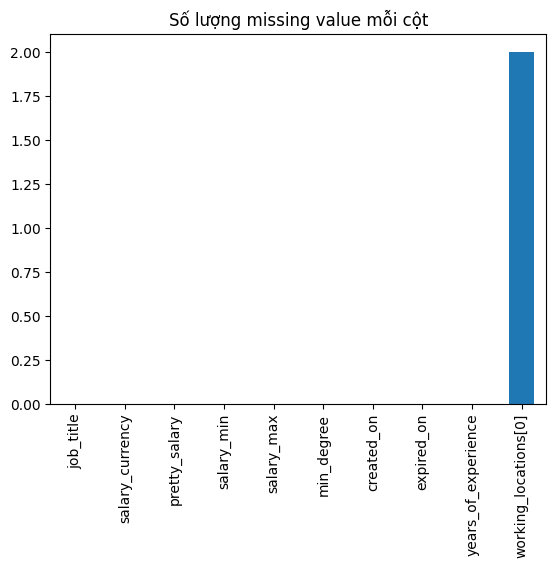

In [8]:
missing = df1.isnull().sum()
print(missing)

missing.plot(kind='bar')
plt.title("Số lượng missing value mỗi cột")
plt.show()

In [9]:
def clean_job_title(title):
    if pd.isna(title):
        return title
    
    s = str(title)
    
    # 1. Bỏ số + dấu phẩy ở đầu
    s = re.sub(r'^\d+,\s*', '', s)
    
    # 2. Bỏ tất cả nội dung trong () và []
    s = re.sub(r'\(.*?\)', '', s)
    s = re.sub(r'\[.*?\]', '', s)
    
    # 3. Bỏ các từ khóa tuyển dụng dư thừa
    s = re.sub(r'Tuyển Dụng|TUYỂN DỤNG', '', s, flags=re.IGNORECASE)
    
    # 4. Bỏ ký tự _ hoặc - dư
    s = re.sub(r'[_\-]+', ' ', s)
    
    # 5. Chuẩn hóa khoảng trắng
    s = re.sub(r'\s+', ' ', s)
    return s

df_clean = df1.copy()

df_clean['job_title'] = df_clean['job_title'].apply(clean_job_title)
df_clean

,job_title,salary_currency,pretty_salary,salary_min,salary_max,min_degree,created_on,expired_on,years_of_experience,working_locations[0]
0,QA Game Tester,USD,Thương lượng,0,0,Cao đẳng,2025-11-06T16:07:05+07:00,2026-01-07T23:59:59+07:00,0,Hồ Chí Minh
1,Data and Analytics Supervisor,USD,Thương lượng,0,0,Cử nhân,2025-10-23T16:30:36+07:00,2025-12-24T23:59:59+07:00,5,Hồ Chí Minh
2,AI Engineer Khối Công nghệ thông tin,USD,Thương lượng,0,0,Cử nhân,2025-11-27T16:00:21+07:00,2025-12-27T23:59:59+07:00,1,Hà Nội
3,FullStack Developer Khối Công nghệ thông tin,USD,Thương lượng,0,0,Cử nhân,2025-11-27T16:03:40+07:00,2025-12-27T23:59:59+07:00,1,Hà Nội
4,Nhân Viên IT,VND,13tr-15tr ₫/tháng,13000000,15000000,Cử nhân,2025-11-24T16:19:49+07:00,2025-12-24T23:59:59+07:00,1,Hải Phòng
...,...,...,...,...,...,...,...,...,...,...
704,Database Reliability Engineer,USD,$ 65tr-80tr /tháng,65000000,80000000,Cử nhân,2025-11-21T20:01:18+07:00,2025-12-21T23:59:59+07:00,3,Hồ Chí Minh
705,IT Security & Support Engineer,USD,Thương lượng,0,0,Cử nhân,2025-11-21T19:06:39+07:00,2025-12-21T23:59:59+07:00,1,Hà Nội
706,ERP Application Engineer,USD,Thương lượng,0,0,Cử nhân,2025-11-21T17:14:58+07:00,2025-12-21T23:59:59+07:00,3,Hải Phòng
707,Nhân Viên Kỹ Thuật,VND,12tr-25tr ₫/tháng,12000000,25000000,Cao đẳng,2025-11-21T15:05:20+07:00,2025-12-21T23:59:59+07:00,1,NaN


In [10]:
def format_date(date):

    date = str(date)

    return pd.to_datetime(date, errors='coerce').date()


df_clean_date = df_clean.copy()
df_clean_date['created_on'] = df_clean_date['created_on'].apply(format_date)

df_clean_date['expired_on'] = df_clean_date['expired_on'].apply(format_date)

df_clean_date

,job_title,salary_currency,pretty_salary,salary_min,salary_max,min_degree,created_on,expired_on,years_of_experience,working_locations[0]
0,QA Game Tester,USD,Thương lượng,0,0,Cao đẳng,2025-11-06,2026-01-07,0,Hồ Chí Minh
1,Data and Analytics Supervisor,USD,Thương lượng,0,0,Cử nhân,2025-10-23,2025-12-24,5,Hồ Chí Minh
2,AI Engineer Khối Công nghệ thông tin,USD,Thương lượng,0,0,Cử nhân,2025-11-27,2025-12-27,1,Hà Nội
3,FullStack Developer Khối Công nghệ thông tin,USD,Thương lượng,0,0,Cử nhân,2025-11-27,2025-12-27,1,Hà Nội
4,Nhân Viên IT,VND,13tr-15tr ₫/tháng,13000000,15000000,Cử nhân,2025-11-24,2025-12-24,1,Hải Phòng
...,...,...,...,...,...,...,...,...,...,...
704,Database Reliability Engineer,USD,$ 65tr-80tr /tháng,65000000,80000000,Cử nhân,2025-11-21,2025-12-21,3,Hồ Chí Minh
705,IT Security & Support Engineer,USD,Thương lượng,0,0,Cử nhân,2025-11-21,2025-12-21,1,Hà Nội
706,ERP Application Engineer,USD,Thương lượng,0,0,Cử nhân,2025-11-21,2025-12-21,3,Hải Phòng
707,Nhân Viên Kỹ Thuật,VND,12tr-25tr ₫/tháng,12000000,25000000,Cao đẳng,2025-11-21,2025-12-21,1,NaN


In [11]:
final_df = df_clean_date.drop_duplicates(keep='first').reset_index(drop=True)

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   job_title             706 non-null    object
 1   salary_currency       706 non-null    object
 2   pretty_salary         706 non-null    object
 3   salary_min            706 non-null    int64 
 4   salary_max            706 non-null    int64 
 5   min_degree            706 non-null    object
 6   created_on            706 non-null    object
 7   expired_on            706 non-null    object
 8   years_of_experience   706 non-null    int64 
 9   working_locations[0]  704 non-null    object
dtypes: int64(3), object(7)
memory usage: 55.3+ KB


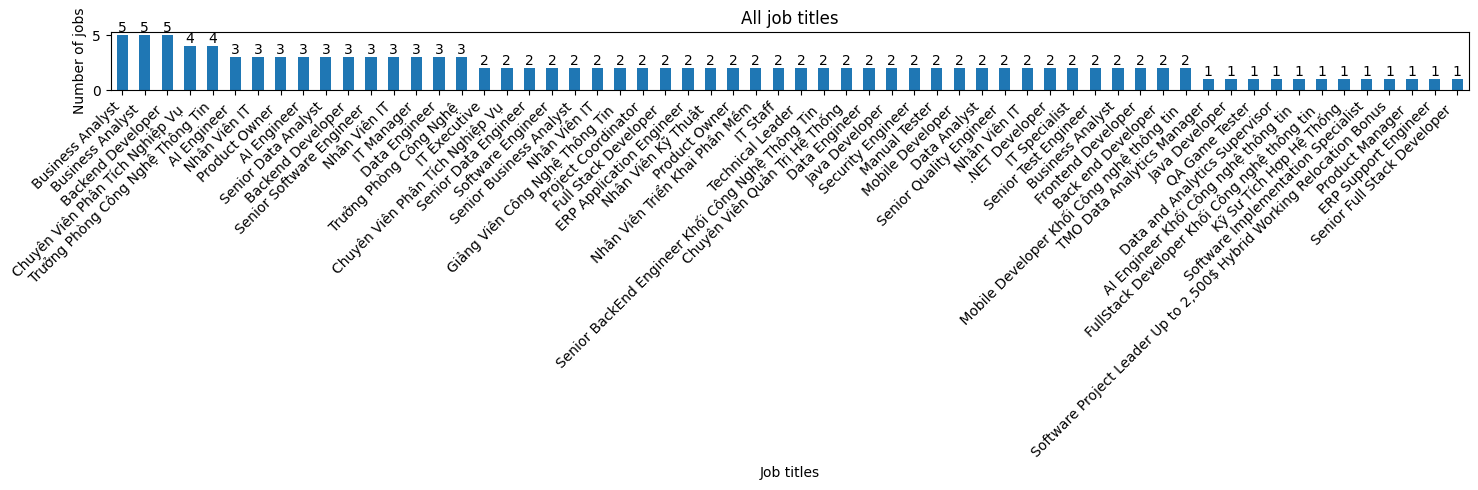

In [12]:
job_count = final_df['job_title'].value_counts().head(60)
fig, ax = plt.subplots(figsize=(15, 5))
job_count.plot(kind='bar', ax = ax)
ax.set_title('All job titles')
ax.set_xlabel('Job titles')
ax.set_ylabel('Number of jobs')

ax.bar_label(ax.containers[0])
 
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [13]:
def format_salary_to_million_vnd(row):
    currency = row['salary_currency']
    salary = row['salary_max']

    if pd.isna(salary):
        return None
    
    if currency == 'USD':
        salary_vnd = salary * USD_TO_VND
    elif currency == 'VND':
        salary_vnd = salary
    else:
        return None

    return salary_vnd / VND_TO_MILLION

final_df['salary_million_vnd'] = final_df.apply(format_salary_to_million_vnd, axis=1)

final_df

,job_title,salary_currency,pretty_salary,salary_min,salary_max,min_degree,created_on,expired_on,years_of_experience,working_locations[0],salary_million_vnd
0,QA Game Tester,USD,Thương lượng,0,0,Cao đẳng,2025-11-06,2026-01-07,0,Hồ Chí Minh,0.00
1,Data and Analytics Supervisor,USD,Thương lượng,0,0,Cử nhân,2025-10-23,2025-12-24,5,Hồ Chí Minh,0.00
2,AI Engineer Khối Công nghệ thông tin,USD,Thương lượng,0,0,Cử nhân,2025-11-27,2025-12-27,1,Hà Nội,0.00
3,FullStack Developer Khối Công nghệ thông tin,USD,Thương lượng,0,0,Cử nhân,2025-11-27,2025-12-27,1,Hà Nội,0.00
4,Nhân Viên IT,VND,13tr-15tr ₫/tháng,13000000,15000000,Cử nhân,2025-11-24,2025-12-24,1,Hải Phòng,15.00
...,...,...,...,...,...,...,...,...,...,...,...
701,Database Reliability Engineer,USD,$ 65tr-80tr /tháng,65000000,80000000,Cử nhân,2025-11-21,2025-12-21,3,Hồ Chí Minh,2160000.00
702,IT Security & Support Engineer,USD,Thương lượng,0,0,Cử nhân,2025-11-21,2025-12-21,1,Hà Nội,0.00
703,ERP Application Engineer,USD,Thương lượng,0,0,Cử nhân,2025-11-21,2025-12-21,3,Hải Phòng,0.00
704,Nhân Viên Kỹ Thuật,VND,12tr-25tr ₫/tháng,12000000,25000000,Cao đẳng,2025-11-21,2025-12-21,1,NaN,25.00


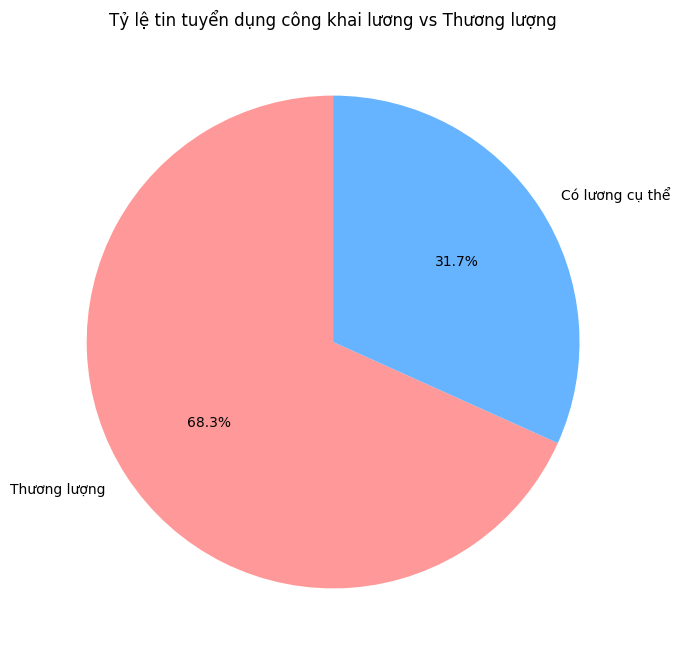

In [14]:
final_df['salary_type'] = final_df['salary_max'].apply(lambda x: 'Thương lượng' if x == 0 else 'Có lương cụ thể')

plt.figure(figsize=(8, 8))
final_df['salary_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Tỷ lệ tin tuyển dụng công khai lương vs Thương lượng')
plt.ylabel('')
plt.show()

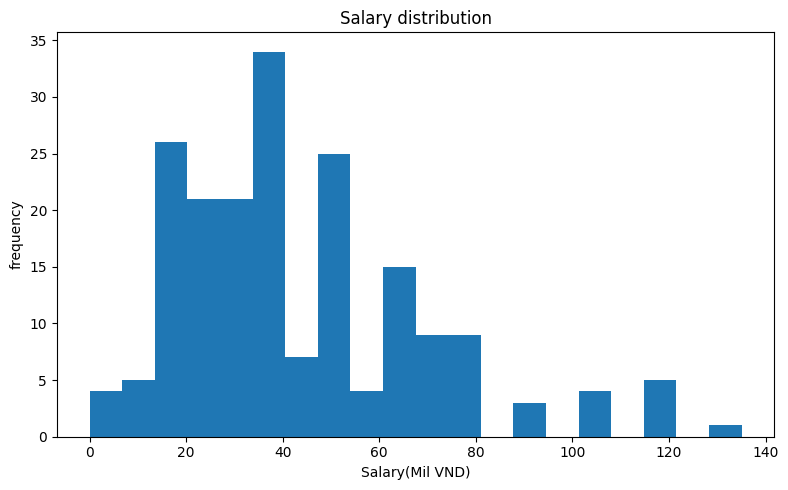

In [15]:
salary_filtered = final_df['salary_million_vnd']
salary_filtered = salary_filtered[
    (salary_filtered > 0) & (salary_filtered < 200)
]
plt.figure(figsize=(8, 5))
salary_filtered.dropna().plot(kind = 'hist', bins = 20)
plt.title('Salary distribution')
plt.xlabel('Salary(Mil VND)')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

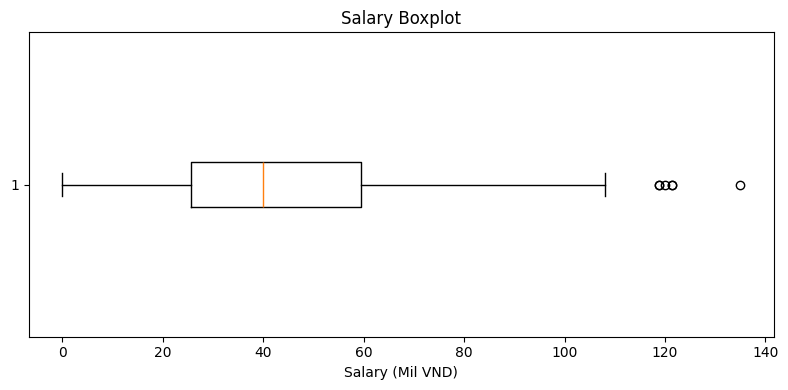

In [16]:
salary_data = final_df["salary_million_vnd"]
salary_data = salary_data[
    (salary_data > 0) & (salary_data < 200)
]

plt.figure(figsize=(8, 4))
plt.boxplot(
    salary_data.dropna(),
    vert=False
)
plt.title('Salary Boxplot')
plt.xlabel('Salary (Mil VND)')
plt.tight_layout()
plt.show()

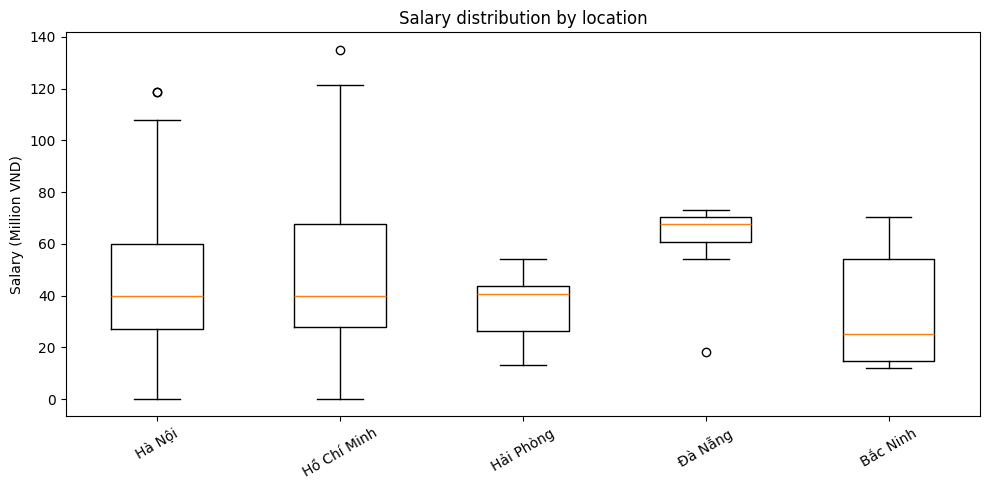

In [17]:
top_locations = final_df['working_locations[0]'].value_counts().head(5).index

df_plot = final_df[
    (final_df["working_locations[0]"].isin(top_locations)) &
    (final_df["salary_million_vnd"] > 0) &
    (final_df["salary_million_vnd"] <= 200)
]

salary_by_location = [
    df_plot[df_plot["working_locations[0]"] == loc]["salary_million_vnd"]
    for loc in top_locations
]

plt.figure(figsize=(10, 5))
plt.boxplot(
    salary_by_location,
    tick_labels=top_locations
)
plt.title("Salary distribution by location")
plt.ylabel("Salary (Million VND)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

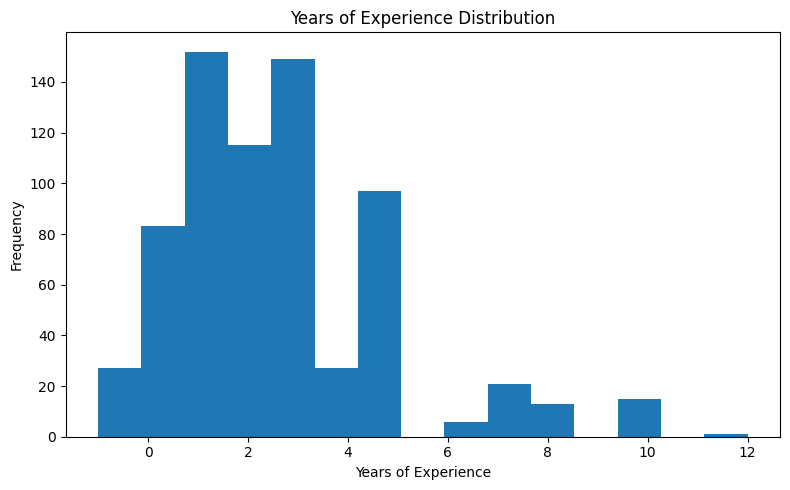

In [18]:
plt.figure(figsize=(8, 5))

final_df["years_of_experience"].dropna().plot(
    kind="hist",
    bins=15
)

plt.title("Years of Experience Distribution")
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()